<h1 align=center> Project 3 - Part 1</h1>
<br>
$$
\textbf{Team G} \\
\text{Evangelou Sotiris 2159}\\
\text{Kalais Konstantinos 2146}\\
\text{Chatziefremidis Leuteris 2209}\\
$$

# Part 1

### $\triangleright$ Exercise 1

In order to minimize $\sum_{i}{(x_{i} - b)}^{2}$ we need to find the b for which the gradient becomes zero. 
<br>
<br>
So, $$
\frac{\partial \sum_{i}{(x_{i} - b)}^{2}}{\partial b} = 0
$$
$$
\frac{\partial \sum_{i}{(x_{i} - b)}^{2}}{\partial b} = 0 \implies \\ -2\sum_{i}{(x_{i}-b)} = 0 \implies \\ \sum_{i}{x_{i}} - \sum_{i}{b} = 0 \implies \\ \sum_{i}{x_{i}} - nb = 0 \implies \\ b = \frac{\sum_{i}{x_{i}}}{n} = E[x_{i}]
$$
<br>
In terms of Normal Distribution, this procedure translates to the Maximum Likelihood Estimation of the population mean $\mu$ , which is $\bar{x}$

### $\triangleright $ Exercise 2
In matrix and vector notation: <br>
$$Y =Xw$$ <br>
Quadratic Loss: 
$$Q(w) = (Y - Xw)^{T}(Y - Xw)$$
<br>
Quadratic Loss minimization:
$$\\ \frac{\partial Q}{\partial w} = -2X(Y- Xw)$$
<br>
So, the Gradient Descent weight update becomes: <br>
$$ \\w_{k+1} = w_{k} - a\frac{\partial Q}{\partial w}$$
<br>
$$ \\w_{k+1} = w_{k} - a(-2X(Y-Xw))\text{, where a : learning rate}$$
<br>
<br>
$\bullet$ We typically choose to use Stochastic Gradient Descent for large datasets, because the iterations take too long if we choose to iterate every sample every time, like in standard Gradient Descent.
<br>
$\bullet$ Also, SGD tends to converge faster because it starts improving its weights from the first sample, but the errors might not be as well minimized as normal GD. 
<br>
$\bullet$ Finally, in the case of many same samples, and because SGD takes randomly samples from the datasets, we might train the model in the same samples over and over resulting in bad model learning although the training accuracy will seem to be very good.

### $\triangleright $ Exercise 3
Exponential Distribution: <br>
$$p(\epsilon) = \frac{1}{2}e^{-|\epsilon|}$$ <br>
Prediction:
$$y = w^{T}x + b + \epsilon$$ <br>
$$\epsilon = y - (w^{T}x + b)$$ <br>
Likelihood: <br>
$$p(y|x) = \frac{1}{2}e^{-|y - (w^{T}x + b)|}$$ <br>
Negative Log-likelihood: <br>
$$ -log(p(y|x)) = -log(\frac{1}{2}e^{-|y - (w^{T}x + b)|}) = log(2) + |y - (w^{T}x + b)|$$ <br>
Derivative of Likelihood: <br>
$$\frac{\partial p(y|x)}{\partial w} = \frac{\partial |y - (w^{T}x + b)|}{\partial w}$$<br>
$\bullet$ Because of the absolute value in the partial derivative, we cannot find a closed form solution for the case that $\epsilon$ is exponentially distributed.

# Part 2

### $\triangleright $ Stochastic Gradient Descent with batch and autograd

In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

#Shuffles the data and splits to batch size
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based
        # on the indices
        
#Linear Regression Y = Xw + b
def linreg(X, w, b):
    return nd.dot(X, w) + b

#Calculates the squared error
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#Stochastic Gradient Descent
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size
        

#Initialize some parameters
num_inputs = 2
num_examples = 1000
batch_size = 10
true_w = nd.array([2, -3.4])
true_b = 4.2

#Generate random features and labels
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

#Generate random weights and bias(Initialization)
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()

lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))
    
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

/home/echatzief/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


epoch 1, loss 0.040640
epoch 2, loss 0.000161
epoch 3, loss 0.000051
Error in estimating w 
[ 0.00062108 -0.00027847]
<NDArray 2 @cpu(0)>
Error in estimating b 
[0.00048351]
<NDArray 1 @cpu(0)>


### $\triangleright $ Exercise 1
<h3>Trying with initial weights = 0.</h3>

In [2]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

#Shuffles the data and splits to batch size
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based
        # on the indices
        
#Linear Regression Y = Xw + b
def linreg(X, w, b):
    return nd.dot(X, w) + b

#Calculates the squared error
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#Stochastic Gradient Descent
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size
        

#Initialize some parameters
num_inputs = 2
num_examples = 1000
batch_size = 10
true_w = nd.array([2, -3.4])
true_b = 4.2

#Generate random features and labels
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

#Generate random weights and bias(Initialization)
w = nd.zeros(shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()

lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))
    
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

epoch 1, loss 0.033946
epoch 2, loss 0.000114
epoch 3, loss 0.000050
Error in estimating w 
[-0.00058556  0.00050116]
<NDArray 2 @cpu(0)>
Error in estimating b 
[0.00051737]
<NDArray 1 @cpu(0)>


### $\triangleright $ Exercise 2 - Ohm's law
<br>
$\bullet$ Ohm's law is a famous law regarding the relationship between <b>electrical current</b> (I) and <b> voltage </b>. It shows that there is a direct proportionality between them, and it's a linear relationship: V = I*R

In [3]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

#Shuffles the data and splits to batch size
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based
        # on the indices
        
#Linear Regression Y = Xw + b
def linreg(X, w):
    return nd.dot(X, w)

#Calculates the squared error
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#Stochastic Gradient Descent
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

#Ohm's law
#V = I * R
R_real = nd.random.normal(scale=1, shape=(1, 1))
R_real = R_real[0][0]
print("Random Picked Real Resistance: ",R_real)

#Initialize some parameters
num_inputs = 1
num_examples = 1000
batch_size = 13

#Generate random data

#I
electric_current = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
#Voltage
voltage =R_real*electric_current 
voltage += nd.random.normal(scale=0.01, shape=voltage.shape)

#Predicted resistance(Initialize)
pred_resist = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
pred_resist.attach_grad()


lr = 0.0088  # Learning rate
num_epochs = 20  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2


for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, electric_current, voltage):
        with autograd.record():
            l = loss(net(X,pred_resist), y)  # Minibatch loss in X and y
        l.backward()  # Compute gradient on l with respect to [w,b]
        sgd([pred_resist], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(electric_current,pred_resist), voltage)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))
    
print('Error in estimating R', R_real - pred_resist)
print('Prediction: ',pred_resist)

Random Picked Real Resistance:  
[1.2489744]
<NDArray 1 @cpu(0)>
epoch 1, loss 0.195700
epoch 2, loss 0.048408
epoch 3, loss 0.012009
epoch 4, loss 0.003003
epoch 5, loss 0.000780
epoch 6, loss 0.000231
epoch 7, loss 0.000096
epoch 8, loss 0.000063
epoch 9, loss 0.000054
epoch 10, loss 0.000052
epoch 11, loss 0.000052
epoch 12, loss 0.000052
epoch 13, loss 0.000052
epoch 14, loss 0.000052
epoch 15, loss 0.000052
epoch 16, loss 0.000052
epoch 17, loss 0.000052
epoch 18, loss 0.000052
epoch 19, loss 0.000052
epoch 20, loss 0.000052
Error in estimating R 
[[-0.00030053]]
<NDArray 1x1 @cpu(0)>
Prediction:  
[[1.249275]]
<NDArray 1x1 @cpu(0)>


### $\triangleright $ Exercise 3 - Planck's law
$\bullet$ Planck's law describes the spectral density of electromagnetic radiation emitted by a black body in thermal equilibrium at a given temperature T, when there is no net flow of matter or energy between the body and its environment.
<br>
<br>

Let  be the radial coordinate in $(n_{x}n_{y}n{z})$-space. Then : 
$$ρ^{2} = (n_{x}^{2} +n_{y}^{2} + n_{z}^{2})$$
<br>
and
$$v = \frac{c}{λ} = \frac{cp}{2α}$$
<br>
The number N(v)dv of independent modes having frequencies in the range v to v+dv equals the volume of the spherical octant shell between ρ and ρ + dρ, multiplied by 2 to account for the two independent polarizations of electromagnetic radiation: 
<br>
<br>
$$N(v)dv = \frac{4\piρ^{2}dp}{8} x 2$$
<br>
$$N(v)dv = \pi(\frac{2αv}{c})^2 \frac{2α}{c}dv$$
<br>
<br>
In thermodynamic equilibrium at temperature T, equipartition of energy implies that each mode has average energy
$\left \langle E \right \rangle$ = kT according to the classical Boltzmann law (but not according to quantum mechanics).If we proceed using the classical kT for the average energy per mode, the spectral energy density $U_{v}(T)$ of cavity radiation in the frequency range v to v + dv is the total energy of all modes in that frequency range divided by the volume $a^{3}$ of the cavity:
<br>
<br>
$$U_{v}(T) = \frac{N(v)dv}{a^3}kT$$
<br>
$$U_{v}(T) = \frac{8\piα^{3}}{α^3}\frac{v^2}{c^3}kT$$
<br>
$$U_{v}(T) = \frac{8\pi\text{kv}^2}{c^3}T$$
<br>
$$ T = \frac{U_{v}(T)c^3}{8\pi kv^2}$$
<br>
<br>
<a href="https://www.cv.nrao.edu/course/astr534/BlackBodyRad.html">Blackbody Radiation</a> <br>
We want to determine the temperature T:

In [4]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler

#Shuffles the data and splits to batch size
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based
        # on the indices
        
#Linear Regression Y = Xw + b
def linreg(X, w):
    return nd.dot(X, w) + b

#Calculates the squared error
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#Stochastic Gradient Descent
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

#Initialize some parameters
num_inputs = 1
num_examples = 100
batch_size = 10

#Define the real temperature
real_temperature = nd.random.normal(scale=1, shape=(1, 1))
real_temperature = real_temperature[0][0]
print("Real Temperature: ",real_temperature)

#Generate velocity,kappa,c
velocity = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
kappa = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
c_parameter = nd.random.normal(scale=1, shape=(num_examples, num_inputs))

#Parameters
features = (8*math.pi*kappa*(velocity.T)**2)/(c_parameter**3)
#print(features)
labels = features *real_temperature
labels += nd.random.normal(scale=1, shape=labels.shape)


#Generate random predict temperature(Ιnitialize)
pred_temp = nd.random.normal(scale=1, shape=(num_inputs, 1))
pred_temp.attach_grad()


lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(pred_temp *X, y)  # Minibatch loss in X and y
            #print(l)
        l.backward()  # Compute gradient on l with respect to [w,b]
        sgd([pred_temp], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(pred_temp *features, labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))
    
print('Error in estimating T:', real_temperature - pred_temp)

Real Temperature:  
[0.05918283]
<NDArray 1 @cpu(0)>
epoch 1, loss nan
epoch 2, loss nan
epoch 3, loss nan
Error in estimating T: 
[[nan]]
<NDArray 1x1 @cpu(0)>


### $\triangleright $ Exercise 4

### $\triangleright $ Exercise 5
We need to reshape y , and turn it into the shape of y_hat in order to subtract them. y_hat is in shape (batch_size,1) and y is in shape (batch_size,). That is because after the net algorithm the y_hat is a column-vector and y is a row-vector, and we need to reshape them to be compatible for calculations.

### $\triangleright $ Exercise 6 
We are going to make the first experiment with 5 different learning rates and plot the loss results after each iteration.

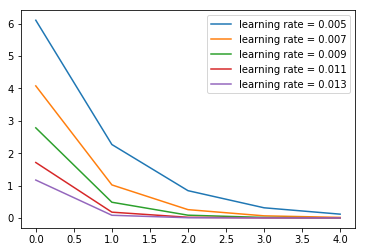

In [5]:
import numpy as np

#Shuffles the data and splits to batch size
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based
        # on the indices
        
#Linear Regression Y = Xw + b
def linreg(X, w, b):
    return nd.dot(X, w) + b

#Calculates the squared error
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#Stochastic Gradient Descent
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size
        
def init_and_run(lr,batch_size):
    num_inputs = 2
    num_examples = 1000
    true_w = nd.array([2, -3.4])
    true_b = 4.2
    features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
    labels = nd.dot(features, true_w) + true_b
    labels += nd.random.normal(scale=0.01, shape=labels.shape)
    w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    num_epochs = 5  # Number of iterations
    net = linreg  # Our fancy linear model
    loss = squared_loss  # 0.5 (y-y')^2
    loss_progress = []
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            with autograd.record():
                l = loss(net(X, w, b), y)  # Minibatch loss in X and y
            l.backward()  # Compute gradient on l with respect to [w,b]
            sgd([w, b], lr, batch_size)  # Update parameters using their gradient
        train_l = loss(net(features, w, b), labels)
        loss_progress.append(train_l.mean().asnumpy())
    return loss_progress
    
lr = 0.005
for i in range(5):
    lp = init_and_run(lr,10)
    plt.plot(lp, label = "learning rate = " + str(np.round(lr,decimals=5)))
    lr += 0.002
plt.legend()
plt.show()

### $\triangleright $ Exercise 7
If the number of examples cannot be divided by the batch size,the data_iter is executed more times than we want.As a result of the above the features,labels are filled with data that doesn't belong to our dataset.